In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

In [2]:
dataframe = pd.read_csv('../Documents/BD/Log.csv', header = 8)

In [3]:
dataframe.head()

,# id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter
0,1510905,2021-08-06 11:05:09,http://115.58.41.152:58759/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510905/,lrz_urlhaus
1,1510904,2021-08-06 11:05:08,http://115.56.142.226:35605/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510904/,lrz_urlhaus
2,1510903,2021-08-06 11:05:06,http://115.51.21.34:41813/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510903/,lrz_urlhaus
3,1510902,2021-08-06 11:04:41,http://112.27.124.111:50811/Mozi.m,offline,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510902/,lrz_urlhaus
4,1510901,2021-08-06 11:03:03,https://cdn.discordapp.com/attachments/8667560...,online,malware_download,None,https://urlhaus.abuse.ch/url/1510901/,JAMESWT_MHT


In [4]:
dataframe['dateadded'] = pd.to_datetime(dataframe['dateadded'])

In [5]:
dataframe.describe(include='all')

/home/stucki/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,# id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter
count,7.868400e+04,78684,78684,78684,78684,78684,78684,78684
unique,NaN,59218,78684,2,1,346,78684,50
top,NaN,2021-07-25 01:52:05,http://115.58.41.152:58759/Mozi.m,offline,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/1510905/,lrz_urlhaus
freq,NaN,10,1,72955,78684,57534,1,56514
first,NaN,2021-07-07 00:03:04,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-08-06 11:05:09,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.471430e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.272629e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.432078e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.451752e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='dateadded', ylabel='count'>

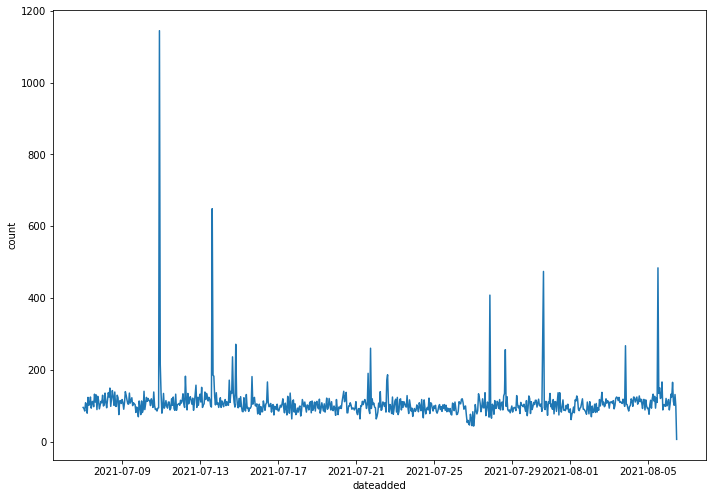

In [6]:
df_ts = dataframe.groupby([pd.Grouper(key='dateadded',freq='H')]).size().reset_index(name='count')

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="count")

In [7]:
df_ts[df_ts['count'] == df_ts['count'].max()]

,dateadded,count
94,2021-07-10 22:00:00,1145


# Distribution

In [8]:
df_ts_sorted = df_ts['count'].sort_values()

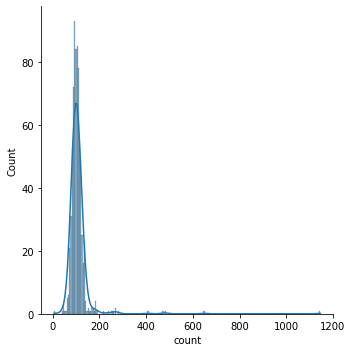

In [9]:
sns.displot(df_ts, x="count", kde=True, height = 5, aspect = 1)

In [10]:
mu, std = norm.fit(df_ts['count'])

In [11]:
borne_max = mu + 2*std
borne_min = mu - 2*std

In [12]:
N1 = df_ts[df_ts['count'] > borne_max].shape[0]
N2 = df_ts[df_ts['count'] < borne_min].shape[0]

In [13]:
N1 + N2

11

<AxesSubplot:xlabel='dateadded', ylabel='count'>

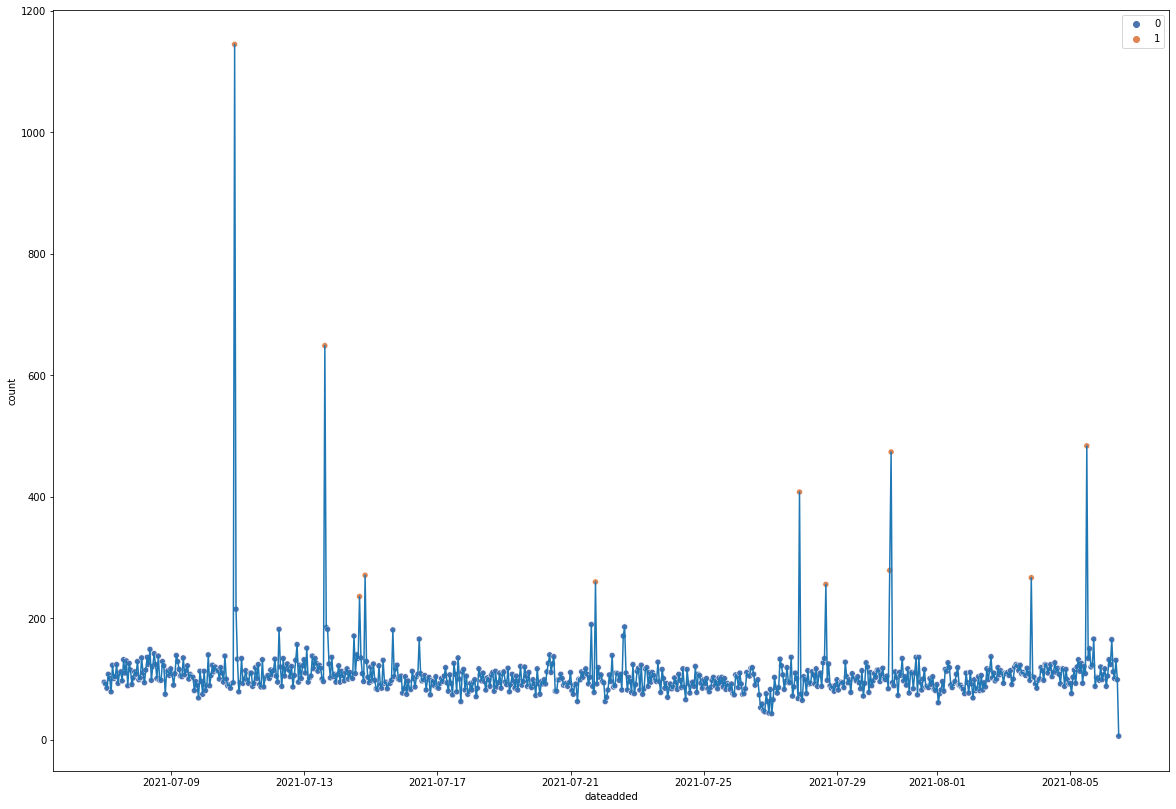

In [14]:
#avg = df_ts_sorted['count'].mean()

def custom_status(count):
    if count > borne_max or count < borne_min:
        return 1
    else:
        return 0

#frames = [too_low_values, too_high_values]
#alert_values = pd.concat(frames)
df_ts['status'] = df_ts.apply(lambda x: custom_status(x['count']) ,axis=1)

dims = (20, 14)
fig, ax = pyplot.subplots(figsize=dims)
sns.scatterplot(ax=ax, data=df_ts, x="dateadded", y="count", hue='status', palette="deep")
sns.lineplot(ax=ax, data=df_ts, x="dateadded", y="count")

In [15]:
occ_reporter = dataframe['reporter'].value_counts()
dataframe_reporter = pd.DataFrame(occ_reporter[:10]).reset_index()
occ_reporter[:10]

lrz_urlhaus      56514
geenensp          9108
Gandylyan1        3013
Cryptolaemus1     1977
Petras_Simeon     1734
tolisec           1709
tammeto           1407
zbetcheckin       1084
abuse_ch           516
switchcert         484
Name: reporter, dtype: int64

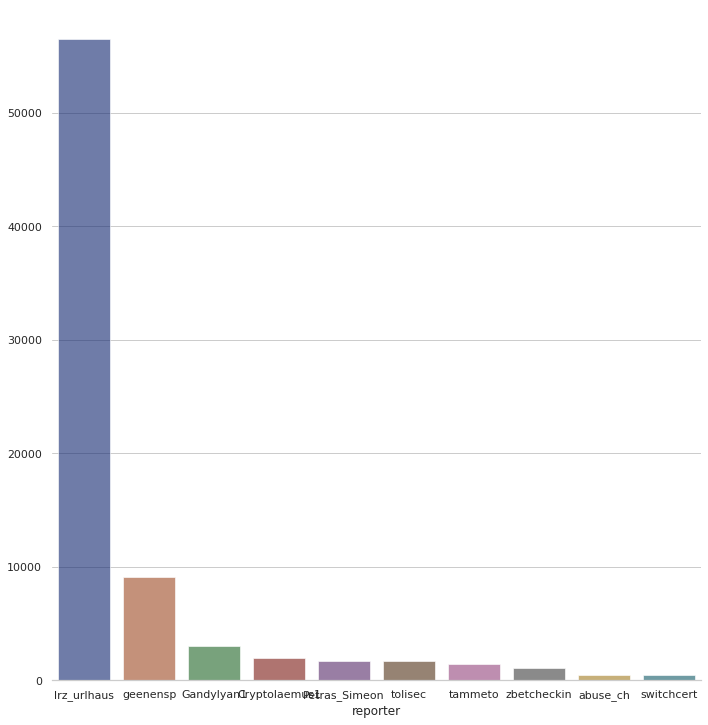

In [16]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=dataframe_reporter,x ="index",y="reporter", kind="bar",ci="sd", palette="dark", alpha=.6, height=10
)

g.despine(left=True)
g.set_axis_labels("reporter", "")